**Understanding how a decision tree works**
### A decision tree consists of creating different rules by which we make the prediction. For example, let’s say we train an algorithm that predicts whether or not a person is obese based on their height and weight. To do this, we will use the following dataset.

In [ ]:
import pandas as pd
import numpy as np

#dataset_url = "https://github.com/Balachandar-R/dataset/blob/main/500_Person_Gender_Height_Weight_Index.csv"

data = pd.read_csv('/content/sample_data/500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Imagine that we want to predict whether or not the person is obese. Based on the description of the dataset (available on Kaggle), people with an index of 4 or 5 are obese, so we could create a variable that reflects this:

In [ ]:
data['obese'] = (data.Index >= 4).astype('int')
data.drop('Index', axis = 1, inplace = True)

In that case, a decision tree would tell us different rules, such as that if the person’s weight is greater than 100kg, it is most likely that the person is obese. However, that cut will not be precise: there will be people who weigh 100kg or more who are not obese. Thus, the decision tree continues to create more branches that generate new conditions to “refine” our predictions.

As you can see, decision trees usually have sub-trees that serve to fine-tune the prediction of the previous node. This is so until we get to a node that does not split. This last node is known as a leaf node or leaf node. Let’s see a graphic example:

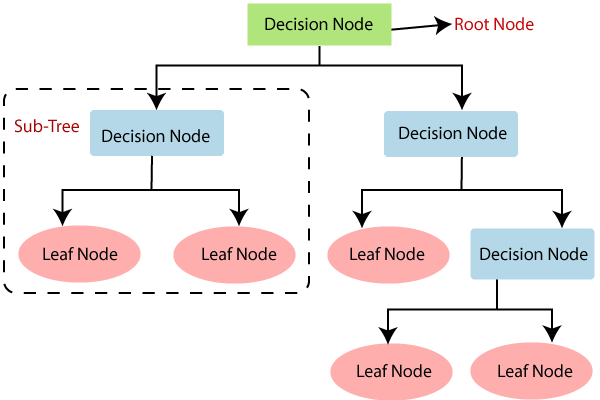

### Besides,a decision trees can work for both regression problems and for classification problems. In fact, we will code a decision tree from scratch that can do both.

**Impurity and cost functions of a decision tree**
As in all algorithms, the cost function is the basis of the algorithm. In the case of decision trees, there are two main cost functions: the Gini index and entropy.

Any of the cost functions we can use are based on measuring impurity. Impurity refers to the fact that, when we make a cut, how likely is it that the target variable will be classified incorrectly.

**In the example above, impurity will include the percentage of people that weight >=100 kg that are not obese and the percentage of people with weight<100 kg that are obese. Every time we make a split and the classification is not perfect, the split is impure.**

However, this does not mean that all cuts are the same: sure that the cut in 100kg classifies better than if we make the split at 80kg. In fact, we can check it:

In [ ]:
print(
  " Misclassified when cutting at 100kg:",
  data.loc[(data['Weight']>=100) & (data['obese']==0),:].shape[0], "\n",
  "Misclassified when cutting at 80kg:",
  data.loc[(data['Weight']>=80) & (data['obese']==0),:].shape[0]
)

 Misclassified when cutting at 100kg: 18 
 Misclassified when cutting at 80kg: 63


In short, **the cost function of a decision tree seeks to find those cuts that minimize impurity.** Now, let’s see what ways exist to calculate impurity:

**Calculate impurity using the Gini index**

The Gini index is the most widely used cost function in decision trees. This index calculates the amount of probability that a specific characteristic will be classified incorrectly when it is randomly selected.

This is an index that ranges from 0 (a pure cut) to 0.5 (a completely pure cut that divides the data equally). The Gini index is calculated as follows:

**𝐺𝑖𝑛𝑖=1–∑𝑖=1𝑛(𝑃𝑖)2**

Where Pi is the probability of having that class or value.

Let’s program the function, considering the input will be a Pandas series:

In [ ]:
def gini_impurity(y):
  '''
  Given a Pandas Series, it calculates the Gini Impurity. 
  y: variable with which calculate Gini Impurity.
  '''
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return(gini)

  else:
    raise('Object must be a Pandas Series.')

gini_impurity(data.Gender) 

0.4998

# **Calculate impurity with entropy**

Entropy it is a way of measuring impurity or randomness in data points. Entropy is defined by the following formula:

**𝐸(𝑆)=∑𝑖=1𝑐−𝑝𝑖𝑙𝑜𝑔2𝑝𝑖**
Unlike the Gini index, whose range goes from 0 to 0.5, the entropy range is different, since it goes from 0 to 1. In this way, values close to zero are less impure than those that approach 1.

**Let’s see how entropy works by calculating it for the same example that we have done with the Gini index:**

As we can see, **the Gini index for the Gender variable is very close to 0.5**. 
This indicates that the Gender variable is very impure, that is, the cutting results are not will both have equally the same proportion of incorrectly classified data.

Now that you know how the index works, **let’s see how entropy works.**

In [ ]:
def entropy(y):
  '''
  Given a Pandas Series, it calculates the entropy. 
  y: variable with which calculate entropy.
  '''
  if isinstance(y, pd.Series):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

  else:
    raise('Object must be a Pandas Series.')

entropy(data.Gender) 

0.9997114388674198

**As we see, it gives us a value very close to 1, which denotes an impurity similar to that indicated by the Gini impurity, whose value is close to 0.5.**

With this, you already know the two main methods that can be used in a decision tree to calculate impurity. Perfect, we already know how to decide if a cut is good or not, but… between which splits do we choose? Let’s see it!

# **How to choose the cuts for our decision tree**
As we have seen, cuts are compared by impurity. Therefore, we are interested in comparing those cuts that generate less impurity. For this, Information Gain is used. This metric indicates the improvement when making different partitions and is usually used with entropy (it could also be used with the Gini index, although in that case it would not be called Informaiton Gain).

The calculation of the Information Gain will depend on whether it is a classification or regression decision tree. There would be two options:

## 𝐼𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛𝐺𝑎𝑖𝑛𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑜𝑛=𝐸(𝑑)–∑|𝑠||𝑑|𝐸(𝑠)
## 𝐼𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛𝐺𝑎𝑖𝑛𝑅𝑒𝑔𝑟𝑒𝑠𝑖𝑜𝑛=𝑉𝑎𝑟𝑖𝑎𝑛𝑐𝑒(𝑑)–∑|𝑠||𝑑|𝑉𝑎𝑟𝑖𝑎𝑛𝑐𝑒(𝑠)

So the Information Gain will look like this:

In [ ]:
def variance(y):
  '''
  Function to help calculate the variance avoiding nan.
  y: variable to calculate variance to. It should be a Pandas Series.
  '''
  if(len(y) == 1):
    return 0
  else:
    return y.var()

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  
  a = sum(mask)
  b = mask.shape[0] - a
  
  if(a == 0 or b ==0): 
    ig = 0
  
  else:
    if y.dtypes != 'O':
      ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
    else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
  return ig

In [ ]:
##Now, we can calculate the information gain of a specific cut:
information_gain(data['obese'], data['Gender'] == 'Male')

-0.0002808244603327431

**Knowing this, the steps that we need to follow in order to code a decision tree from scratch in Python are simple:**

1.Calculate the Information Gain for all variables.

2.Choose the split that generates the highest Information Gain as a split.

3.Repeat the process until at least one of the conditions set by hyperparameters of the algorithm is not fulfilled.

**However, we have a newly added difficulty, and it is, how do we choose which is the best split in the numerical variables? And if there is more than one categorical variable?**

# **How to calculate the best split for a variable**
To calculate the best split of a numeric variable, first, all possible values that the variable is taking must be obtained. Once we have the options, for each option we will calculate the Information Gain using as a filter if the value is less than that value. Obviously, the first possible data will be drop, because the split will include all values.

In case we have categorical variables, the idea is the same, only that in this case we will have to calculate the Information Gain for all possible combinations of that variable, excluding the option that includes all the options (since it would not be doing any split). This is quite computationally costly if we have a high number of categories, that decision tree algorithms usually only accept categorical variables with less than 20 categories.

So, once we have all the splits, we will stick with the split that generates the highest Information Gain.

In [ ]:
import itertools

def categorical_options(a):
  '''
  Creates all possible combinations from a Pandas Series.
  a: Pandas Series from where to get all possible combinations. 
  '''
  a = a.unique()

  opciones = []
  for L in range(0, len(a)+1):
      for subset in itertools.combinations(a, L):
          subset = list(subset)
          opciones.append(subset)

  return opciones[1:-1]

def max_information_gain_split(x, y, func=entropy):
  '''
  Given a predictor & target variable, returns the best split, the error and the type of variable based on a selected cost function.
  x: predictor variable as Pandas Series.
  y: target variable as Pandas Series.
  func: function to be used to calculate the best split.
  '''

  split_value = []
  ig = [] 

  numeric_variable = True if x.dtypes != 'O' else False

  # Create options according to variable type
  if numeric_variable:
    options = x.sort_values().unique()[1:]
  else: 
    options = categorical_options(x)

  # Calculate ig for all values
  for val in options:
    mask =   x < val if numeric_variable else x.isin(val)
    val_ig = information_gain(y, mask, func)
    # Append results
    ig.append(val_ig)
    split_value.append(val)

  # Check if there are more than 1 results if not, return False
  if len(ig) == 0:
    return(None,None,None, False)

  else:
  # Get results with highest IG
    best_ig = max(ig)
    best_ig_index = ig.index(best_ig)
    best_split = split_value[best_ig_index]
    return(best_ig,best_split,numeric_variable, True)


weight_ig, weight_slpit, _, _ = max_information_gain_split(data['Weight'], data['obese'],)  


print(
  "The best split for Weight is when the variable is less than ",
  weight_slpit,"\nInformation Gain for that split is:", weight_ig
)

The best split for Weight is when the variable is less than  103 
Information Gain for that split is: 0.10625190497954848


Now that we know how to calculate the split of a variable, let’s see how to decide the best split.

# **How to choose the best split**
As I have previously said, the best split will be the one that generates the highest Information Gain. To know which one is it, we simply have to calculate the Information Gain for each of the predictor variables of the model.

In [ ]:
data.drop('obese', axis= 1).apply(max_information_gain_split, y = data['obese'])


,Gender,Height,Weight
0,-0.000280824,0.0196836,0.106252
1,[Male],174,103
2,False,True,True
3,True,True,True


As we can see, the variable with the highest Information Gain is Weight. Therefore, it will be the variable that we use first to do the split. In addition, we also have the value on which the split must be performed: 103.

With this, we already have the first split, which would generate two dataframes. If we apply this recursively, we will end up creating the entire decision tree (coded in Python from scratch). Let’s do it!

# **How to train a decision tree in Python from scratch**
# **Determining the depth of the tree**
We already have all the ingredients to calculate our decision tree. Now, we must create a function that, given a mask, makes us a split.

In addition, we will include the different hyperparameters that a decision tree generally offers. Although we could include more, the most relevant are those that prevent the tree from growing too much, thus avoiding overfitting. These hyperparameters are as follows:

max_depth: maximum depth of the tree. If we set it to None, the tree will grow until all the leaves are pure or the hyperparameter min_samples_split has been reached.

min_samples_split: indicates the minimum number of observations a sheet must have to continue creating new nodes.

min_information_gain: the minimum amount the Information Gain must increase for the tree to continue growing.

With this in mind, let’s finish creating our decision tree from 0 in Python. To do this, we will:

1.Make sure that the conditions established by min_samples_split and max_depth are being fulfilled.

2.Make the split.

3.Ensure that min_information_gain if fulfilled.

4.Save the data of the split and repeat the process.

To do this, first of all, I will create three functions: one that, given some data, returns the best split with its corresponding information, another that, given some data and a split, makes the split and returns the prediction and finally, a function that given some data, makes a prediction.

**Note: the prediction will only be given in the branches and basically consists of returning the mean of the data in the case of the regression or the mode in the case of the classification.**

In [ ]:
def get_best_split(y, data):
  '''
  Given a data, select the best split and return the variable, the value, the variable type and the information gain.
  y: name of the target variable
  data: dataframe where to find the best split.
  '''
  masks = data.drop(y, axis= 1).apply(max_information_gain_split, y = data[y])
  if sum(masks.loc[3,:]) == 0:
    return(None, None, None, None)

  else:
    # Get only masks that can be splitted
    masks = masks.loc[:,masks.loc[3,:]]

    # Get the results for split with highest IG
    split_variable = max(masks)
    #split_valid = masks[split_variable][]
    split_value = masks[split_variable][1] 
    split_ig = masks[split_variable][0]
    split_numeric = masks[split_variable][2]

    return(split_variable, split_value, split_ig, split_numeric)


def make_split(variable, value, data, is_numeric):
  '''
  Given a data and a split conditions, do the split.
  variable: variable with which make the split.
  value: value of the variable to make the split.
  data: data to be splitted.
  is_numeric: boolean considering if the variable to be splitted is numeric or not.
  '''
  if is_numeric:
    data_1 = data[data[variable] < value]
    data_2 = data[(data[variable] < value) == False]

  else:
    data_1 = data[data[variable].isin(value)]
    data_2 = data[(data[variable].isin(value)) == False]

  return(data_1,data_2)

def make_prediction(data, target_factor):
  '''
  Given the target variable, make a prediction.
  data: pandas series for target variable
  target_factor: boolean considering if the variable is a factor or not
  '''

  # Make predictions
  if target_factor:
    pred = data.value_counts().idxmax()
  else:
    pred = data.mean()

  return pred

Training our decision tree in Python
Now that we have these three functions, we can, let’s train the decision tree that we just programmed in Python.

1. We ensure that both min_samples_split and max_depth are fulfilled.

2. If they are fulfilled, we get the best split and obtain the Information Gain. If any of the conditions are not fulfilled, we make the prediction.

3. We check that the Information Gain Comprobamos passes the minimum amount set by min_information_gain.

4. If the condition above is fulfilled, we make the split and save the decision. If it is not fulfilled, then we make the prediction.

We will do this process recursively, that is, the function will call itself. The result of the function will be the rules you follow to make the decision:

In [ ]:
def train_tree(data,y, target_factor, max_depth = None,min_samples_split = None, min_information_gain = 1e-20, counter=0, max_categories = 20):
  '''
  Trains a Decission Tree
  data: Data to be used to train the Decission Tree
  y: target variable column name
  target_factor: boolean to consider if target variable is factor or numeric.
  max_depth: maximum depth to stop splitting.
  min_samples_split: minimum number of observations to make a split.
  min_information_gain: minimum ig gain to consider a split to be valid.
  max_categories: maximum number of different values accepted for categorical values. High number of values will slow down learning process. R
  '''

  # Check that max_categories is fulfilled
  if counter==0:
    types = data.dtypes
    check_columns = types[types == "object"].index
    for column in check_columns:
      var_length = len(data[column].value_counts()) 
      if var_length > max_categories:
        raise ValueError('The variable ' + column + ' has '+ str(var_length) + ' unique values, which is more than the accepted ones: ' +  str(max_categories))

  # Check for depth conditions
  if max_depth == None:
    depth_cond = True

  else:
    if counter < max_depth:
      depth_cond = True

    else:
      depth_cond = False

  # Check for sample conditions
  if min_samples_split == None:
    sample_cond = True

  else:
    if data.shape[0] > min_samples_split:
      sample_cond = True

    else:
      sample_cond = False

  # Check for ig condition
  if depth_cond & sample_cond:

    var,val,ig,var_type = get_best_split(y, data)

    # If ig condition is fulfilled, make split 
    if ig is not None and ig >= min_information_gain:

      counter += 1

      left,right = make_split(var, val, data,var_type)

      # Instantiate sub-tree
      split_type = "<=" if var_type else "in"
      question =   "{} {}  {}".format(var,split_type,val)
      # question = "\n" + counter*" " + "|->" + var + " " + split_type + " " + str(val) 
      subtree = {question: []}


      # Find answers (recursion)
      yes_answer = train_tree(left,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      no_answer = train_tree(right,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      if yes_answer == no_answer:
        subtree = yes_answer

      else:
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)

    # If it doesn't match IG condition, make prediction
    else:
      pred = make_prediction(data[y],target_factor)
      return pred

   # Drop dataset if doesn't match depth or sample conditions
  else:
    pred = make_prediction(data[y],target_factor)
    return pred

  return subtree


max_depth = 5
min_samples_split = 20
min_information_gain  = 1e-5


decisiones = train_tree(data,'obese',True, max_depth,min_samples_split,min_information_gain)


decisiones

{'Weight <=  103': [{'Weight <=  74': [0,
    {'Weight <=  84': [{'Weight <=  75': [1, 0]},
      {'Weight <=  98': [1, 0]}]}]},
  1]}

**It is done! The decision tree we just coded in Python has created all the rules that it will use to make predictions.**

Now, there would only be one thing left: convert those rules into concrete actions that the algorithm can use to classify new data. Let’s go for it!

# Predict using our decision tree in Python
To make the prediction, we are going to take an observation and the decision tree. These decisions can be converted into real conditions by splitting them.

So, to make the prediction we are going to:

1. Break the decision into several chunks.

2. Check the type of decision that it is (numerical or categorical).

3. Considering the type of variable that it is, check the decision boundary. If the decision is fulfilled, return the result, if it is not, then continue with the decision..

In [ ]:
def clasificar_datos(observacion, arbol):
  question = list(arbol.keys())[0] 

  if question.split()[1] == '<=':

    if observacion[question.split()[0]] <= float(question.split()[2]):
      answer = arbol[question][0]
    else:
      answer = arbol[question][1]

  else:

    if observacion[question.split()[0]] in (question.split()[2]):
      answer = arbol[question][0]
    else:
      answer = arbol[question][1]

  # If the answer is not a dictionary
  if not isinstance(answer, dict):
    return answer
  else:
    residual_tree = answer
    return clasificar_datos(observacion, answer)

So, we can try to classify all the data in our algorithm to see how well our decision tree has worked that we just programmed in Python: